# Reading files in different formats

<br>

Nowadays, we can work with a large amount of data that comes from different sources and in different formats. Excel files with **xls** and **xlsx** formats, as well as other well-known formats such as **csv** and **txt**.

In this practice we will see how we can read those files, as well as a series of basic commands to modify and manipulate those data frames in the first instance.


## Goal

- Learn how we can open different data formats using **Pandas**.

In [1]:
# import libraries
#=================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Open excel files

To open excel files we will use the function `pd.read_excel()`.
<br>

In this case, within the excel files we find two formats, the **xls** and the **xlsx** format. It is important to know what format we are dealing with, because currently we will have to carry out one process or another when opening the files.

## **Xls files**

In this case, we are going to use a data frame that collects information about the different creatures in the Pokemon world, specifically, all the 1st Generation Pokemon.

In [5]:
# Open Xls file
#=================================

poke = pd.read_excel("PokemonGen.xls")

poke.head()


,Unnamed: 0,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


## Select column as index

In this case, we have imported together with the data table the index generated in the previous program (either Excel or another). However, if we do not indicate the column or the name of the index, Python will generate yours automatically.

To **select the index column** we will be using the `index_col` command.

In [8]:
# Select column by position
#=================================
# poke = pd.read_excel("PokemonGen.xls", index_col=0)


# Select column by name
#=================================
poke = pd.read_excel("PokemonGen.xls", index_col="Unnamed: 0")


poke.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


## Modify the index

Many times, it will happen that our data table already has an index. In that case, if it is an index that interests us and that is necessary to understand the data (populations, dates ...) we will have to **modify the index** that Python generates for us.

To ** modify the index ** we will use the `df.index` function

In [9]:
# Select the index with the iloc function (column position)
#=================================
poke.index = poke.iloc[:, -1]


# Select the index indicating the name of the column 
#=================================
poke.index = poke["#"]


# Remove the column in question 
#=================================
poke = poke.drop("#", axis=1)

poke.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


## **Xlsx files**

In this case, we are going to use a data frame that includes information about the performance of a group of students in different subjects, as well as a series of attributes of their environment.


**For XLSX files**, it is currently necessary to add the `engine` command. This process is not necessary when opening xls files (at least currently).

In [13]:
# Open an excel file (xlsx)
#=================================
stu = pd.read_excel("StudentsPerformance.xlsx", engine="openpyxl")

stu.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Select a specific sheet

When we deal with excel files or other similar ones, they can have more than one datasheet. On many occasions, we will have to select one or another sheet to work on it.

The `read_excel` function shows you **by default the first sheet** of the file.

To **select a sheet** we will use the command `sheet_name`.

In [12]:
# Selec sheet by position 
#=================================
stu_sheet0 = pd.read_excel("StudentsPerformance.xlsx", sheet_name=0, engine="openpyxl")


# Select sheet by name
#=================================
stu_sheet1 = pd.read_excel("StudentsPerformance.xlsx", sheet_name="Sheet1", engine="openpyxl")


stu.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score
0,female,group B,bachelor's degree,standard,none,72
1,female,group C,some college,standard,completed,69
2,female,group B,master's degree,standard,none,90
3,male,group A,associate's degree,free/reduced,none,47
4,male,group C,some college,standard,none,76


## Modify column names

In this case, we want to rename the columns. It is very **IMPORTANT** to avoid that our headers have **blank spaces**. This can cause us problems when we want to work with them or clean data.

To do this, we can modify it directly when opening the file using the `names` command.

In [14]:
# Create a variable with corrected names
#=================================

new_names = ["Gender", "Race/Ethnicity", "Parental_Education", "Lunch", "Test_preparation_course", "Math_score", 
            "Reading_score", "Writing_score"]


# Assing new column names
#=================================

stu = pd.read_excel("StudentsPerformance.xlsx", engine="openpyxl", names=new_names)


stu.head()


,Gender,Race/Ethnicity,Parental_Education,Lunch,Test_preparation_course,Math_score,Reading_score,Writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


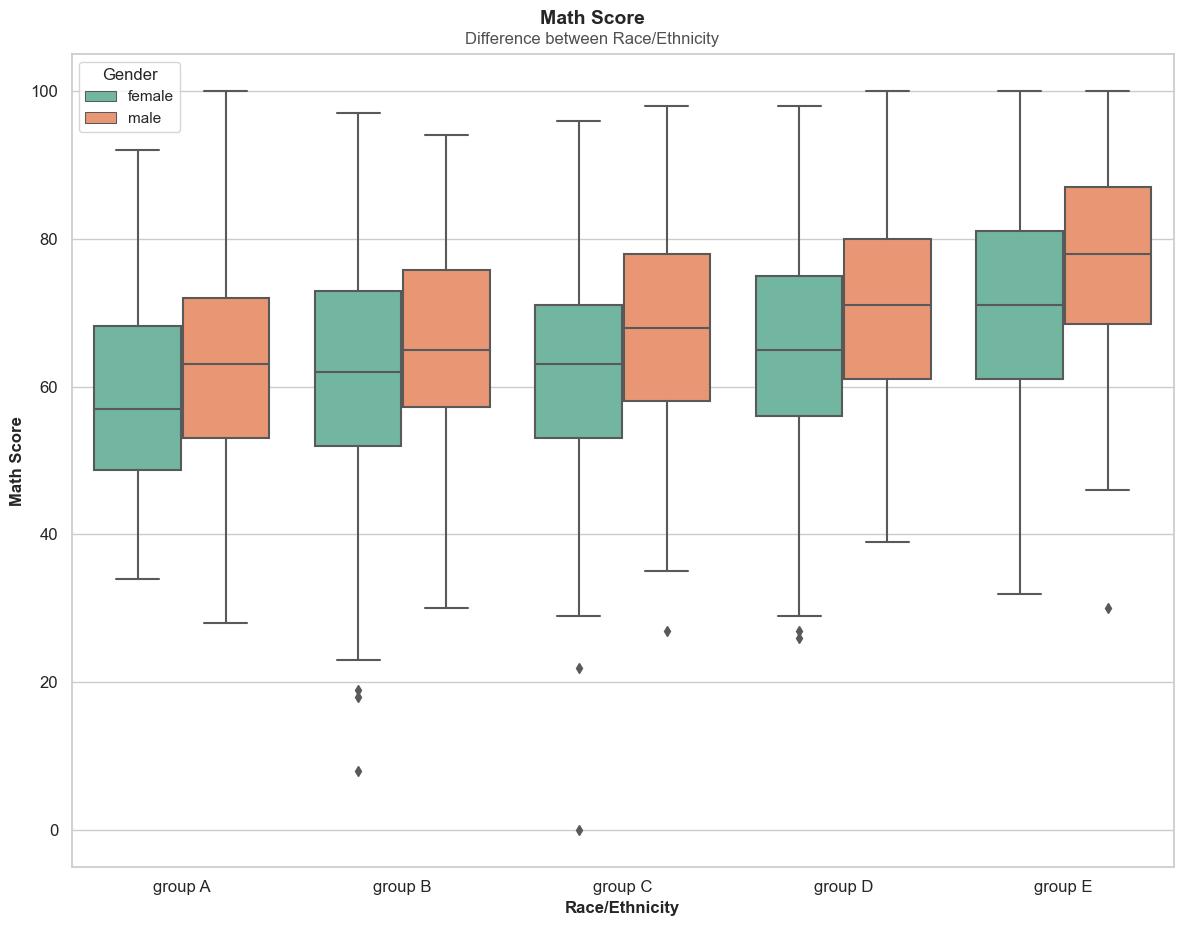

In [15]:
# Create a plot using categorical data
#=================================

sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,10), dpi=100)


sns.boxplot(x=stu["Race/Ethnicity"], 
            y= stu["Math_score"],
            hue=stu["Gender"],
            ax=ax,
            palette="Set2",
            order=["group A","group B","group C","group D","group E"])

ax.set_xlabel("Race/Ethnicity", fontsize=12, fontweight="bold")
ax.set_ylabel("Math Score", fontsize=12, fontweight="bold")

ax.tick_params(labelsize=12)


fig.text(x=0.50, y=0.91, s="Math Score",fontsize=14, fontweight="bold",ha="center")
fig.text(x=0.50, y=0.89, s="Difference between Race/Ethnicity",fontsize=12, alpha=0.8,ha="center")

fig.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()


# More information about plots and visualizations in my tutorial plots & visualizations (chek out my Github)

# Other files (csv, txt ...)

To open csv files we will use the `read_csv` function.

In this case, through the `read_csv` function we can open different files both **csv** and **txt**. We can also use commands that allow us to discern the **type of separator** we use, as well as many other functions.

## **Csv files**

In this case, we are going to use a file that collects data from the Titanic, specifically, of each passenger and a serie of attributes of each of these. This is a csv of a series of files to make a predictive model to measure the survival of the passengers of the Titanic.


In [16]:
# Open a csv file
#=================================
train = pd.read_csv("train.csv")

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Modify name of headers

In this case, we have the names of the columns in English but we would be interested in changing them to the same ones in Spanish, since it is easier if we are not native English speakers.

To do this, we will use the `df.cols` function.

In [17]:
# Create our list with names in Spanish
#=================================

cols =  ["Pasajeros", "Supervivientes", "Clase", "Nombre", "Sexo", "Edad", "HerEsp",
         "PaHi", "Ticket", "Tasa", "Cabina", "Embarque"]


# Assign to the columns our variable cols
#=================================
train.columns = cols


train.head()

,Pasajeros,Supervivientes,Clase,Nombre,Sexo,Edad,HerEsp,PaHi,Ticket,Tasa,Cabina,Embarque
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Open txt files

In this case, we will use a file that collects data about a series of students and how the performance of extracurricular activities influences them.

To open txt files we will use the `read_csv` function.

In this case, it is a comma separated file and therefore it is the same as opening a csv file. However, on many occasions we will work with other separations such as **tabs** or separated by **semicolons**. In those cases, we can also use the `read_csv` function and we will also use the` sep = `command to indicate how our data is separated.

In [18]:
# Open a txt file 
#=================================
after = pd.read_csv("AfterSchool.txt", index_col=0, sep=",")

after.head()

,Treatment,Aggress,Delinq,Victim
ID,,,,
1,0,63.162641,44.463082,64.429964
2,0,51.827282,76.813612,64.429964
3,0,74.498000,50.933188,41.541056
4,0,40.491922,44.463082,41.541056
5,0,56.361425,44.463082,52.985510


# It's all by now!

## Session Information

In [103]:
from sinfo import sinfo

sinfo()

-----
matplotlib  3.3.2
pandas      1.1.5
seaborn     0.11.1
sinfo       0.3.1
-----
IPython             7.19.0
jupyter_client      6.1.7
jupyter_core        4.7.0
jupyterlab          2.2.6
notebook            6.1.6
-----
Python 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
Windows-10-10.0.19041-SP0
8 logical CPU cores, Intel64 Family 6 Model 126 Stepping 5, GenuineIntel
-----
Session information updated at 2021-04-28 11:51
